In [1]:
import PIL
from PIL import Image, ImageDraw, ImageFont
import json
import numpy as np
import os
from tqdm import tqdm
from IPython.display import display

In [2]:
def draw_text_with_new_lines(text, font, img_width, img_height):
    image = Image.new('RGB', (img_width, img_height), color=(255, 255, 255))
    draw = ImageDraw.Draw(image)
    lines = text.split('\n')
    y_text = None
    for line in lines:
        left, top, right, bottom = font.getbbox(line)
        line_height = bottom - top
        line_width = right - left

        if y_text is None:
            y_text = (img_height - line_height * len(lines)) / 2 if (img_height - line_height * len(lines)) / 2 > 0 else 0
        x_text = (img_width - line_width) / 2 if (img_width - line_width) / 2 > 0 else 0
        draw.text((x_text-left, y_text-top),
                  line, font=font, fill=(0, 0, 0))
        y_text += line_height
    return image

In [3]:
font_dir = '../gwfonts/'
output_dir = '../gwfonts-images/'
font_paths = os.listdir(font_dir)
print(f'font files: {len(font_paths)}')

font files: 1169


In [4]:
char_size = 150
width_weight = 0.8
text = 'The quick\nbrown fox\njumps over\nthe lazy dog'
line_num = text.count('\n') + 1

width = int(char_size * len(text) * width_weight / line_num)
height = int(char_size * 1.5) * line_num
print(width, height)

1290 900


In [5]:
for i in tqdm(range(len(font_paths))):
  font_file = font_paths[i]
  try:
    font_name = os.path.splitext(font_file)[0]
    font = ImageFont.truetype(font_dir + font_file, char_size)
    image = draw_text_with_new_lines(text, font, width, height)
    image.save(output_dir + font_name + '.png')
  except Exception as e:
    print(font_file)
    print(e)


100%|██████████| 1169/1169 [00:22<00:00, 50.83it/s]


# show font image

font_path = '../giiw'

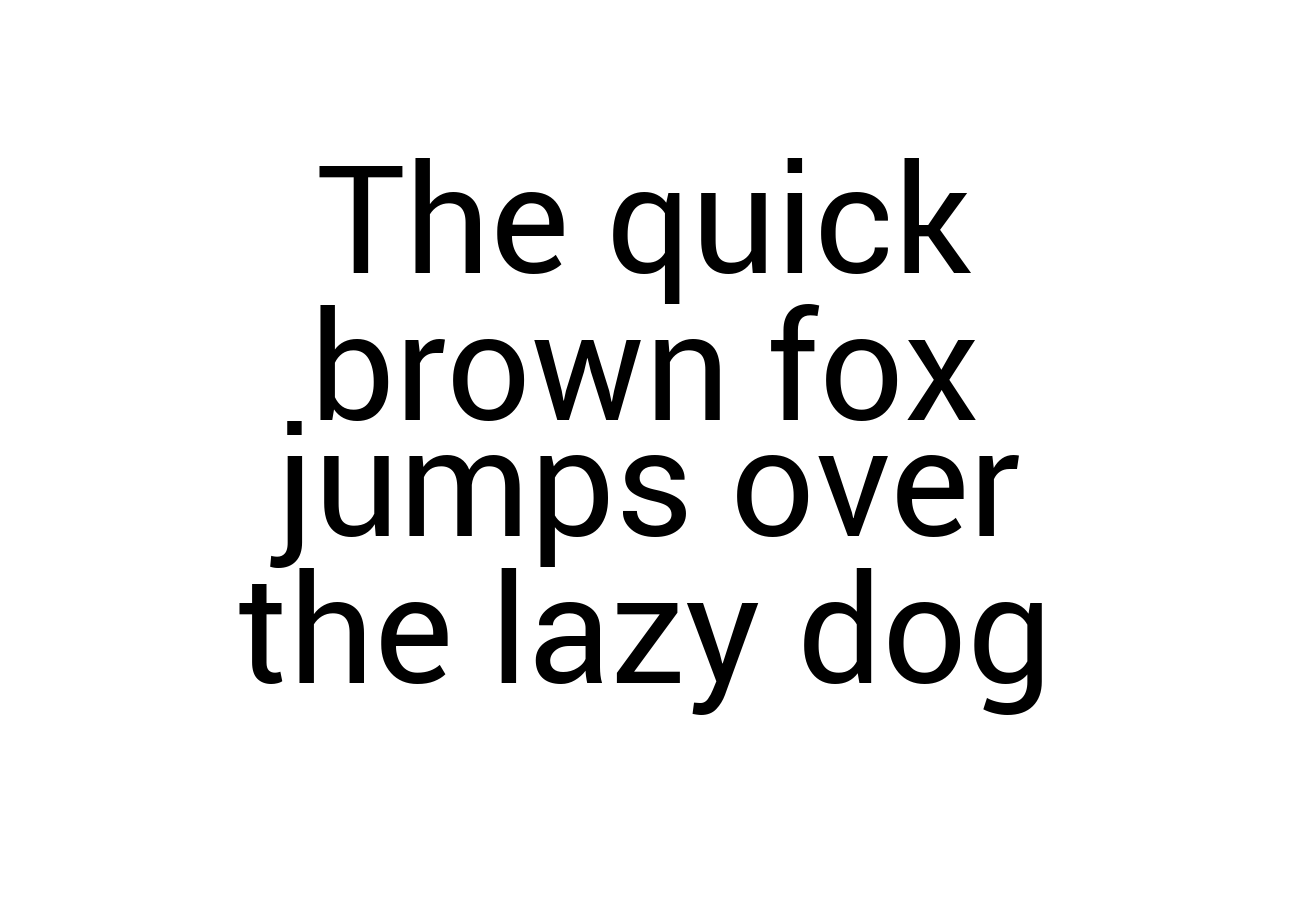

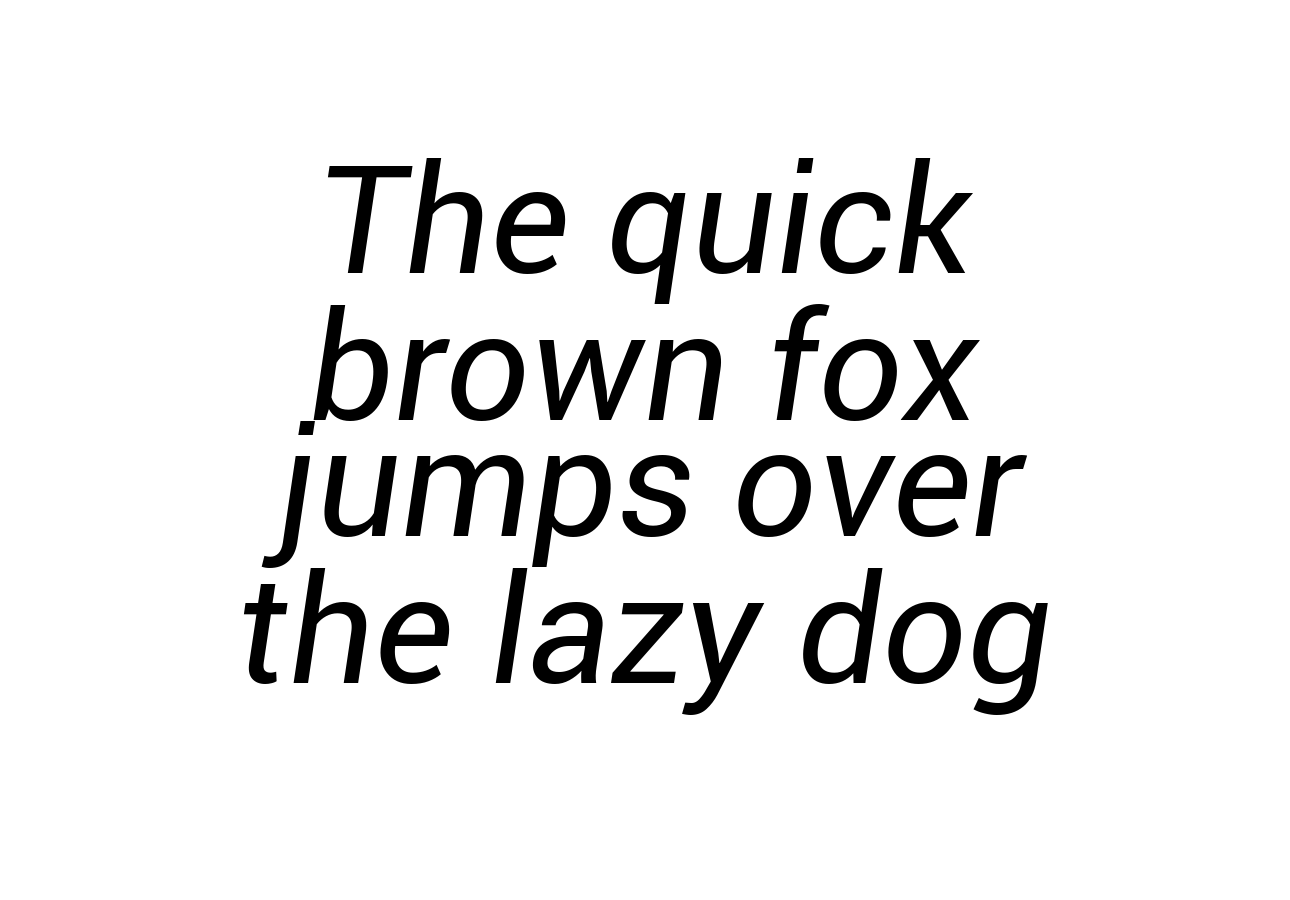

In [10]:
font_path = '../gwfonts/Roboto-Regular.ttf'
font = ImageFont.truetype(font_path, char_size)
image1 = draw_text_with_new_lines(text, font, width, height)
font_path = '../gwfonts/Roboto-Italic.ttf'
font = ImageFont.truetype(font_path, char_size)
image2 = draw_text_with_new_lines(text, font, width, height)
display(image1)
display(image2)

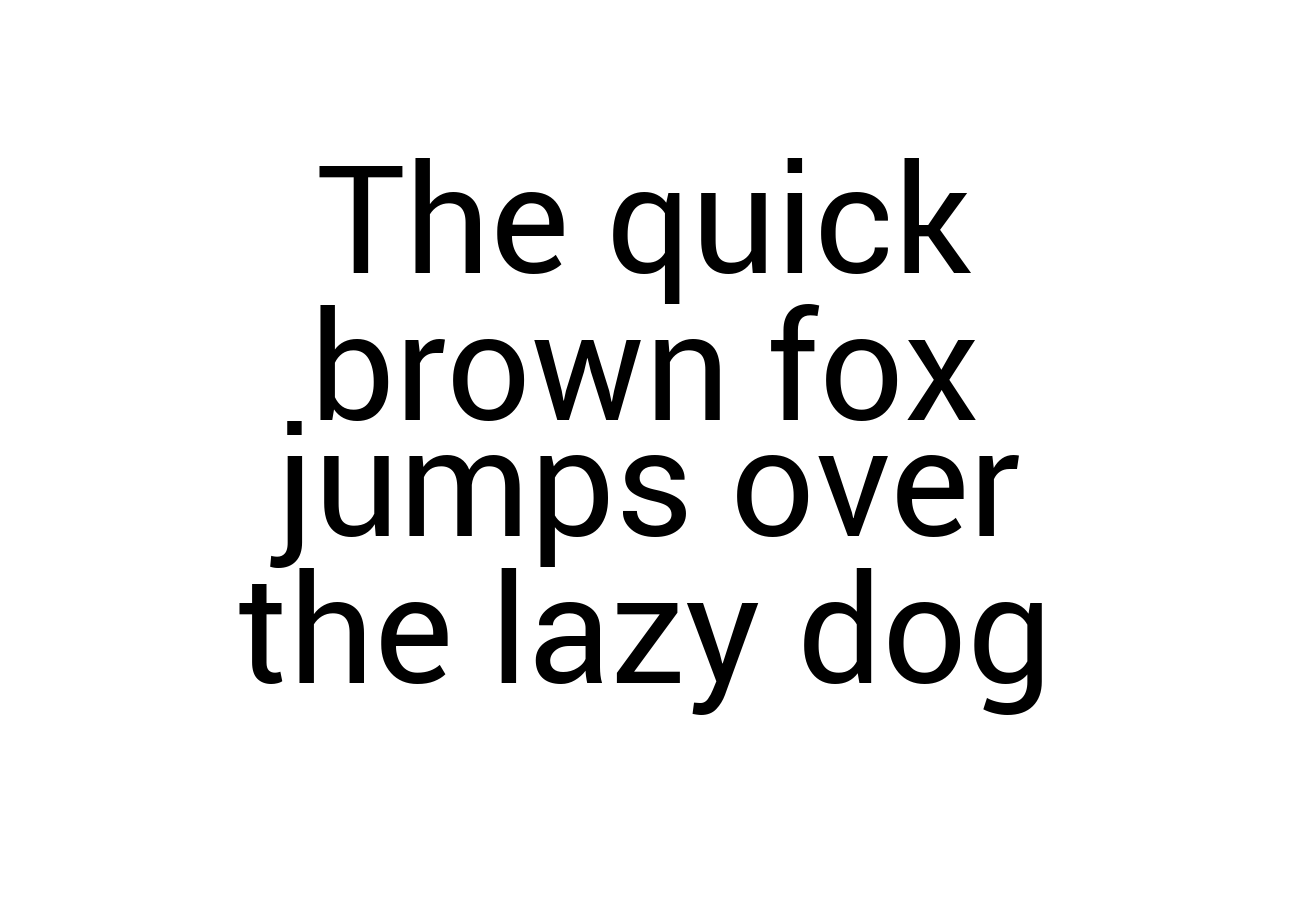

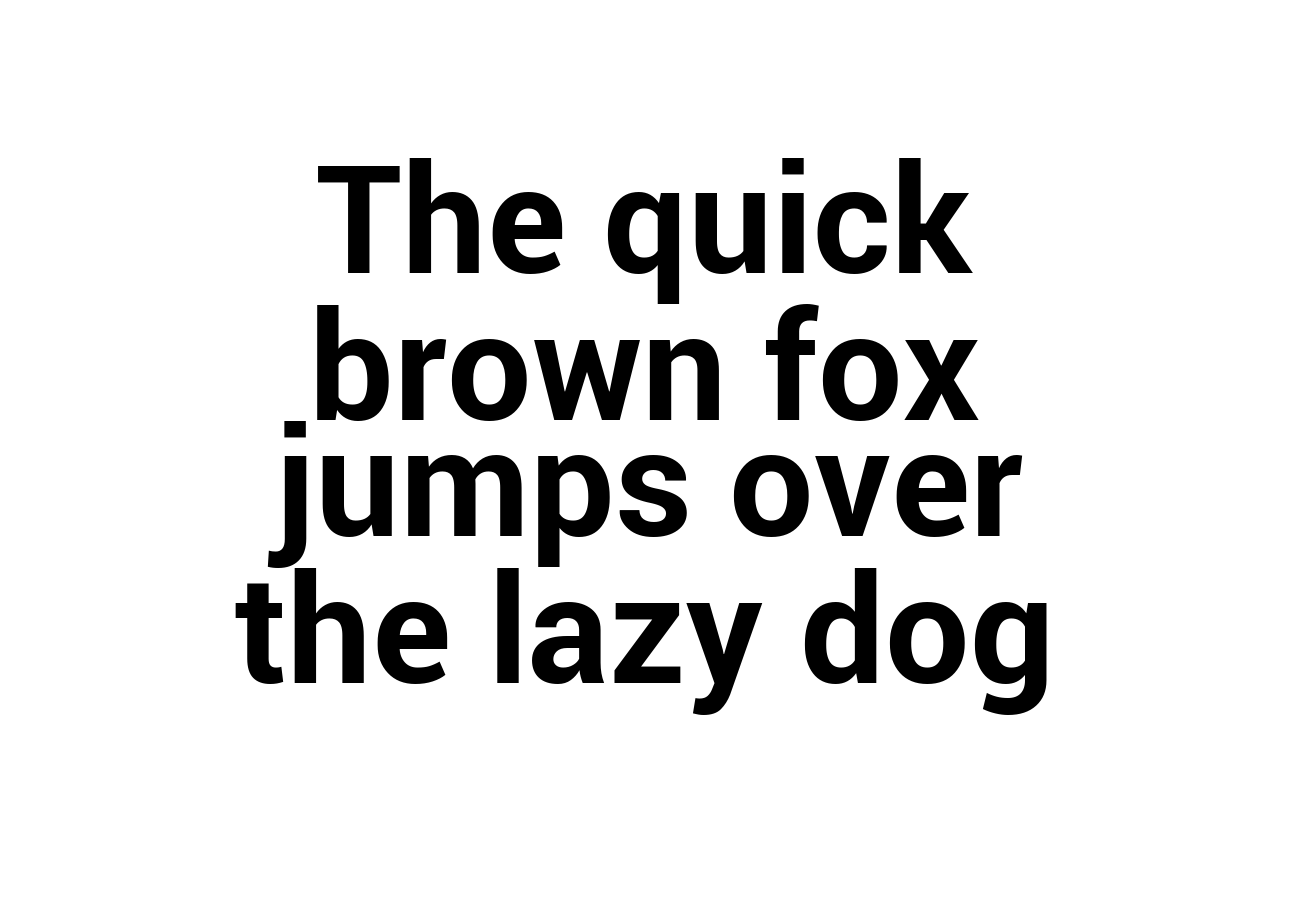

In [11]:
font_path = '../gwfonts/Roboto-Regular.ttf'
font = ImageFont.truetype(font_path, char_size)
image1 = draw_text_with_new_lines(text, font, width, height)
font_path = '../gwfonts/Roboto-Bold.ttf'
font = ImageFont.truetype(font_path, char_size)
image2 = draw_text_with_new_lines(text, font, width, height)
display(image1)
display(image2)